# Fourier analysis of a field distribution
Additional Python notebook for the Fourier analysis of a filed distribution of a three-phase winding. 

In [1]:
import numpy as np

## General machine parameters

In [2]:

p = 2   # number of pole pairs
m = 3   # number of phases
q = 2   # number of notches
N = 40  # winding number
delta = 0.001 # air gap length
I = 30  # current in A, rms


## number of harmonics
k = np.array([1,5,7,11,13,17,19])


## Maximum flux density
The maximum flux density is given with:
\begin{equation*}
    \hat{B} = \frac{\mu_{\mathrm{0}}N \hat{i}}{2 \delta}.
\end{equation*}

In [5]:
# maximum flux density
hat_B = (4*np.pi*10**-7 * N * I * np.sqrt(2))/(2*delta)

## Fundamental wave $B^{(1)}_{\mathrm{a}}$ and $B^{(1)}$

The fundamental wave for phase a is given by
\begin{equation*}
    \hat{B}^{(1)}_{\mathrm{a}} = \frac{4}{\pi} \hat{B} \xi_{\mathrm{w,}1},
\end{equation*}
and for the three-phase system
\begin{equation*}
    \hat{B}^{(1)} = \frac{6}{\pi} \hat{B} \xi_{\mathrm{w,}1}.
\end{equation*}

In [6]:
# fundamental wave B_a of phase a
fundamental_B_a = hat_B *4/(np.pi)*0.933 # (5.26)

# fundamental wave B
fundamental_B  = hat_B *6/(np.pi*p)*0.933 # (5.16)

# Distribution, pitch and winding factor
The distribution factor is defined with:
\begin{equation*}
    \xi_{\mathrm{d,}k} = \frac{\sin\left( \frac{k\cdot \pi}{2m}\right)}{q\sin\left(\frac{k\cdot\pi}{2mq}\right)}.
\end{equation*}

The pitch factor calculated by:
\begin{equation*}
    \xi_{\mathrm{p,}k} = \sin\left(k\cdot \frac{\pi}{2} \frac{y}{\rho_{\mathrm{p}}} \right).
\end{equation*}

The winding factor is defined as follows:
\begin{equation*}
    \xi_{\mathrm{w,}k} = \xi_{\mathrm{d,}k} \xi_{\mathrm{p,}k}.
\end{equation*}

In [3]:
xi_d = np.zeros(k.size)
xi_p = np.zeros(k.size)
xi_w = np.zeros(k.size)

for ii in range(1,k.size+1):

    # distribution factor
    xi_d[ii-1] = np.sin((k[ii-1]*np.pi)/(2*m))/(q*np.sin((k[ii-1]*np.pi)/(2*m*q)))

    # pitch factor
    xi_p[ii-1] = np.sin(k[ii-1]*(np.pi/2)*(5/6))

    # winding factor
    xi_w[ii-1] = xi_d[ii-1] * xi_p[ii-1]



## Fourier coefficients
Calculation of the Fourier coefficients for the flux density in the air gap.

In [7]:
B_k = np.zeros(k.size)
rel_B_k = np.zeros(k.size)

for ii in range(1,k.size+1):
    B_k[ii-1] = (6/np.pi)*hat_B * (1/k[ii-1]) *xi_w[ii-1]
    rel_B_k[ii-1] = B_k[ii-1]/B_k[0]*100

## Flux density of phase a in the air gap
Task description:
Sketch the flux density of the fundamental wave in the air gap of phase a, when the current reached its maximum. In addition, draw the flux density of the 11th harmonic.

In [8]:
import matplotlib.pyplot as plt

# render text in latex mode
plt.rcParams['text.usetex'] = True

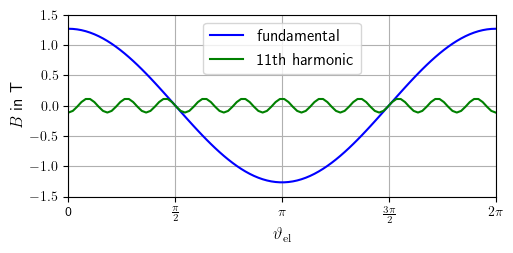

In [9]:
rho_p = np.linspace(0,2*np.pi,100)

ii = 0 # select the fundamental wave
hat_B_1 = 4/np.pi * hat_B * np.cos(rho_p) * (1/k[ii]) * xi_w[ii]

ii = 3 # select 11th harmonic
hat_B_11 = 4/np.pi * hat_B * np.cos(11*rho_p) * (1/k[ii]) * xi_w[ii]



cm = 1/2.54  # centimeters in inches

fig, axs = plt.subplots(1,1,figsize=(14*cm, 6*cm))
axs.plot(rho_p, hat_B_1, 'b', rho_p, hat_B_11,'g')
axs.set_xlim(0, 2*np.pi)
axs.set_ylim(-1.5,1.5)
axs.set_xlabel(r'$\vartheta_{\mathrm{el}}$',fontsize=12)
plt.xticks([0,np.pi/2, np.pi,(3/2)*np.pi,2*np.pi], ['0',r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$',r'$2\pi$'])
axs.set_ylabel('$B$ in T',fontsize=12)
axs.grid(True)
axs.legend(['fundamental','11th harmonic'],loc='upper center',fontsize=12)






In [9]:
#fig.savefig('C:/Git/EMD_Course/exercise/fig/ex04/FundamentalAnd11thHarmonic.pdf',
#            bbox_inches='tight')